In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set(style = "ticks", color_codes = True)
data = pd.read_csv("DavisThin.csv")
pd.set_option("display.precision", 4)
pd.set_option("display.width", None)
data.head()

,Unnamed: 0,DT1,DT2,DT3,DT4,DT5,DT6,DT7
0,1,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0


In [17]:
data.describe()

,Unnamed: 0,DT1,DT2,DT3,DT4,DT5,DT6,DT7
count,191.0000,191.0000,191.0000,191.0000,191.0000,191.0000,191.0000,191.0000
mean,96.0000,0.4660,1.0209,0.9581,0.3403,1.1099,0.9319,0.5654
std,55.2811,0.8383,1.2813,1.2517,0.8042,1.3193,1.2399,1.0536
min,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,48.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,96.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,143.5000,1.0000,2.0000,2.0000,0.0000,3.0000,2.0000,1.0000
max,191.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000


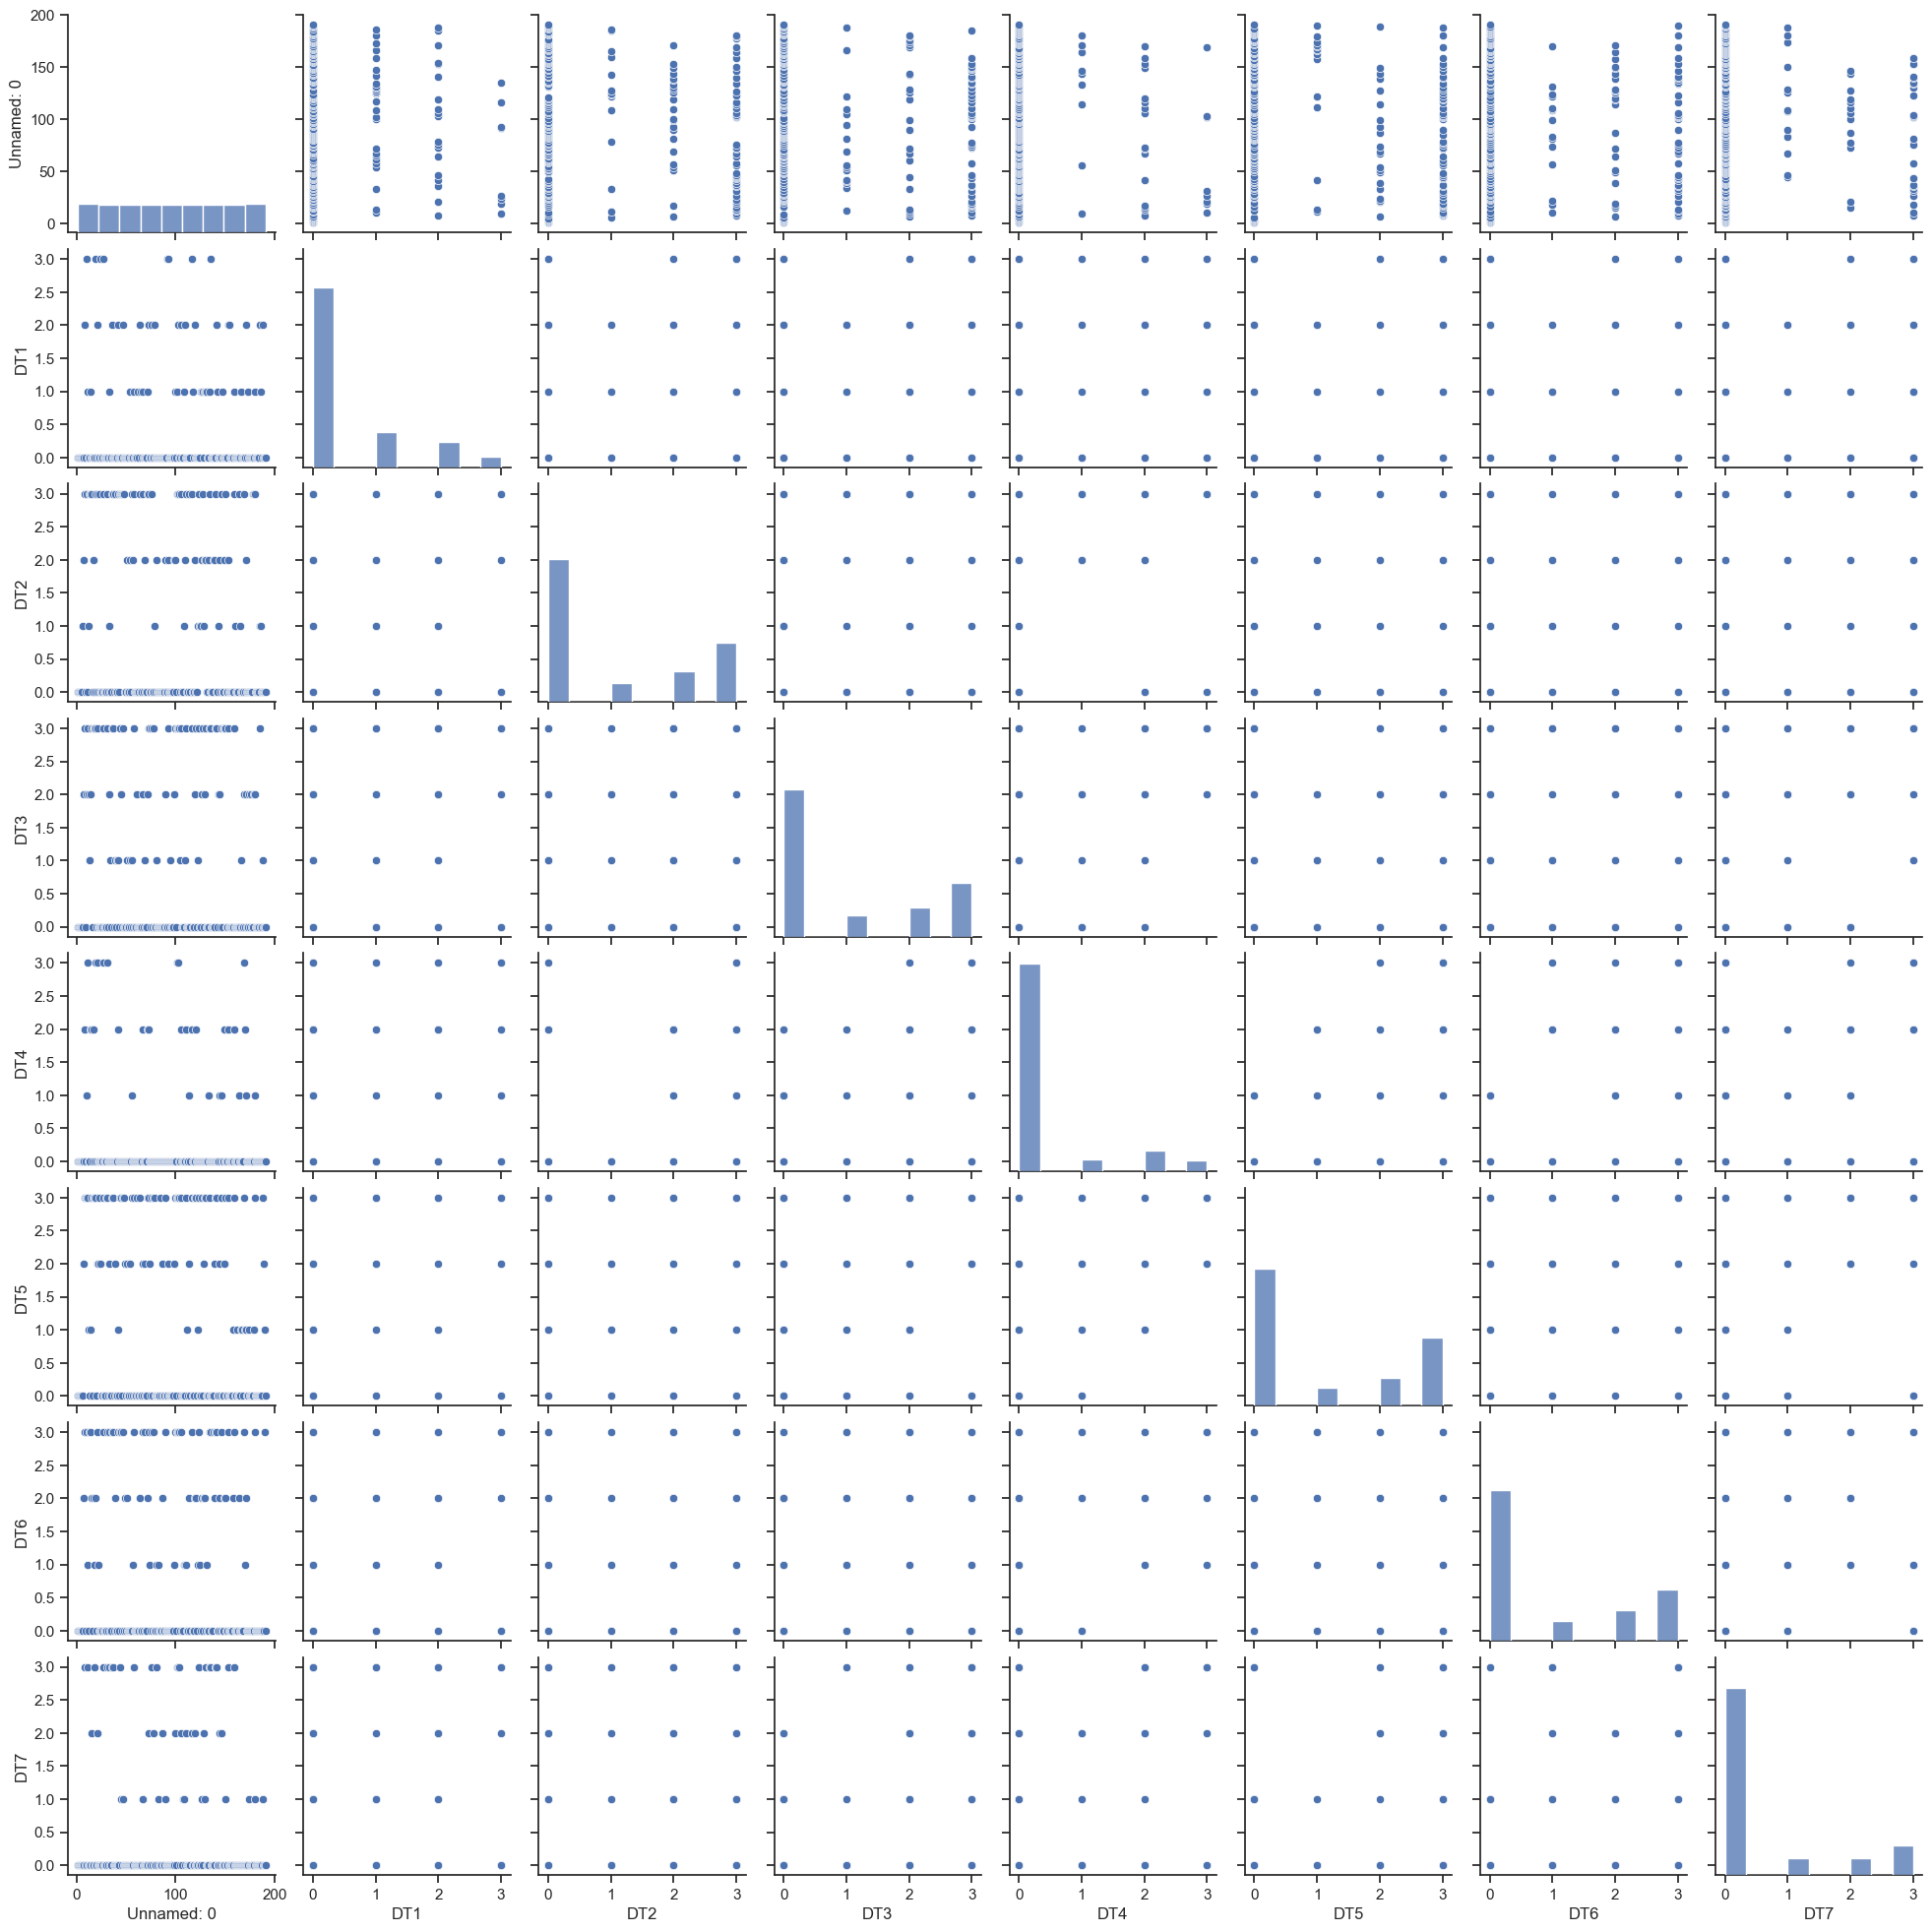

In [21]:
sns.set(style = "ticks", color_codes = True)
graph = sns.pairplot(data)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

X_data = data.copy()
X_data.pop("DT1")
X_data.pop("Unnamed: 0")

X_train, X_test, y_train, y_test = train_test_split(X_data, data["DT1"], test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression

lin_regression = LinearRegression()

lin_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [35]:
for i, name in enumerate(X_data.columns):
    print(f"{name:>10}: {lin_regression.coef_[i]}")

       DT2: -0.005466909327129837
       DT3: 0.09345759843064372
       DT4: 0.1838703166473116
       DT5: -0.007277790650687552
       DT6: 0.0649199115622793
       DT7: 0.09509543720234681


In [36]:
lin_regression.intercept_

0.1860919672688876

In [37]:
predicted = lin_regression.predict(X_test)

expected = y_test

In [43]:
predicted[:5]

array([1.10968144, 0.56517523, 0.18609197, 0.18609197, 0.36754025])

In [39]:
expected[:5]

18     3
128    1
42     0
74     0
142    0
Name: DT1, dtype: int64

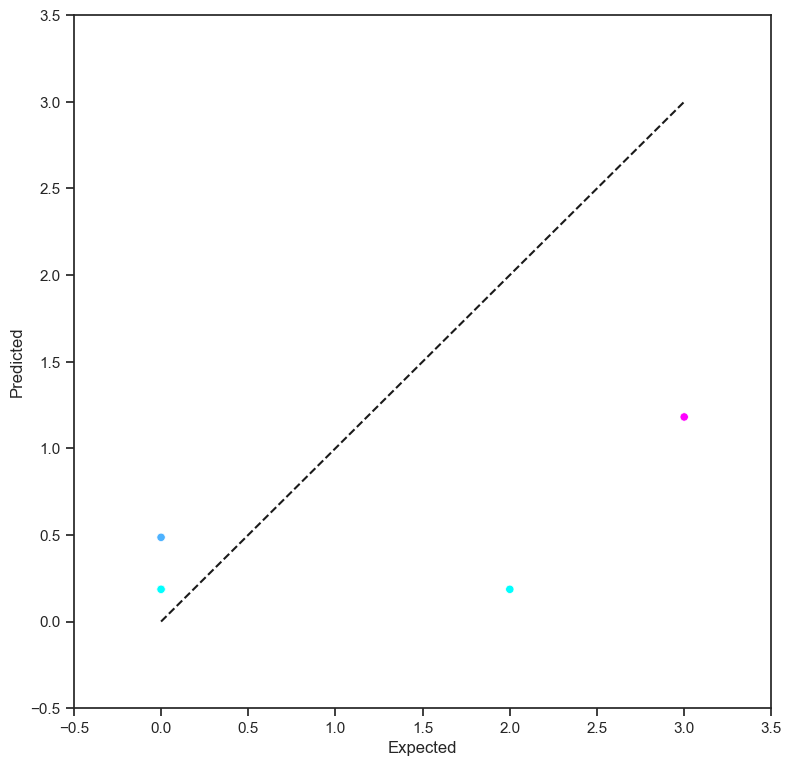

In [46]:
comparison = pd.DataFrame()
comparison["Expected"] = pd.Series(expected)
comparison["Predicted"] = pd.Series(predicted)
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=comparison, x="Expected", y="Predicted", hue="Predicted", palette="cool", legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start - 0.5, end + 0.5)
axes.set_ylim(start - 0.5, end + 0.5)
line = plt.plot([start,end], [start, end], "k--")

In [47]:
from sklearn import metrics

metrics.r2_score(expected, predicted)

0.24859521685251185

In [48]:
metrics.mean_squared_error(expected, predicted)

0.6471665127700259

In [49]:
data.corr()

,Unnamed: 0,DT1,DT2,DT3,DT4,DT5,DT6,DT7
Unnamed: 0,1.0000,-0.0369,-0.1127,-0.0659,-0.1052,-0.1632,-0.0944,-0.0661
DT1,-0.0369,1.0000,0.3535,0.4300,0.3569,0.3627,0.3800,0.3437
DT2,-0.1127,0.3535,1.0000,0.6405,0.5038,0.6494,0.7165,0.4824
DT3,-0.0659,0.4300,0.6405,1.0000,0.5162,0.7168,0.6967,0.7085
DT4,-0.1052,0.3569,0.5038,0.5162,1.0000,0.4656,0.5142,0.3680
DT5,-0.1632,0.3627,0.6494,0.7168,0.4656,1.0000,0.6996,0.6176
DT6,-0.0944,0.3800,0.7165,0.6967,0.5142,0.6996,1.0000,0.6702
DT7,-0.0661,0.3437,0.4824,0.7085,0.3680,0.6176,0.6702,1.0000


In [51]:
from scipy.stats import shapiro

shapiro(data["DT1"])

ShapiroResult(statistic=0.6073963642120361, pvalue=1.1092213325555505e-20)